## DBSCAN

**DBSCAN infers the number of clusters based on the data, and it can discover clusters of arbitrary shape (for comparison, K-Means usually discovers spherical clusters)**

* ɛ(eps): The radius of our neighborhoods around a data point p.
* min_samples : The minimum number of data points we want in a neighborhood to define a cluster.

#### Working

* Pick a point at random that has not been assigned to a cluster or been designated as an outlier. Compute its neighborhood to determine if it’s a core point. If yes, start a cluster around this point. If no, label the point as an outlier.
* Then, expand cluster by adding all directly-reachable points to the cluster. Perform “neighborhood jumps” to find all density-reachable points and add them to the cluster. If an outlier is added, change that point’s status from outlier to border point.
* Repeat these two steps until all points are either assigned to a cluster or designated as an outlier.

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

In [6]:
cd

C:\Users\HP


In [7]:
data =  pd.read_csv("my_machine-learning/datasets/wholesale_data.csv")

In [8]:
data = data[["Grocery", "Milk"]]
data = data.as_matrix().astype("float32", copy = False)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dbsc = DBSCAN(eps = .5, min_samples = 15)
y_dbsc = dbsc.fit_predict(data)

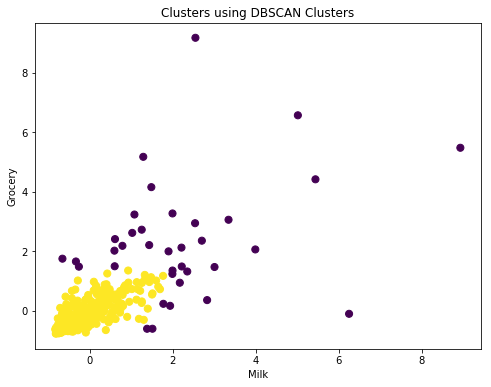

In [19]:
fig = plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=y_dbsc, s=50, cmap='viridis')
plt.title('Clusters using DBSCAN Clusters')
plt.ylabel('Grocery')
plt.xlabel('Milk')
plt.show()

In [13]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
y_kmeans = kmean.fit_predict(data)

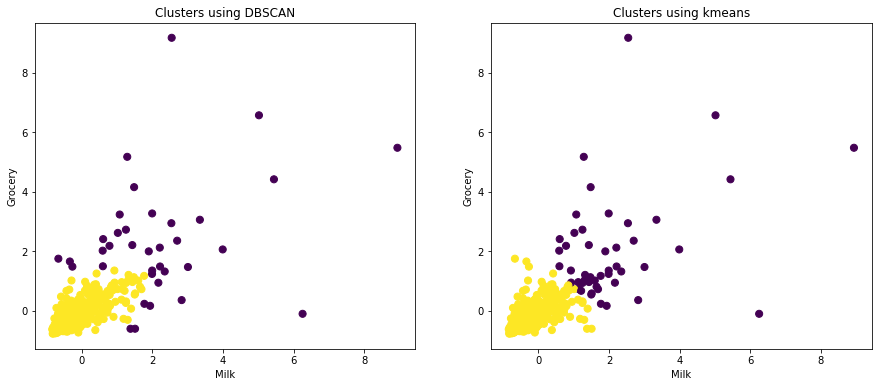

In [20]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], c=y_dbsc, s=50, cmap='viridis')
plt.title('Clusters using DBSCAN')
plt.ylabel('Grocery')
plt.xlabel('Milk')

plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis_r')
plt.title('Clusters using kmeans')
plt.ylabel('Grocery')
plt.xlabel('Milk')
plt.show()

We can clearly see the difference between dbscan and kmeans (kmeans trying to create specrical clusters)

#### Disadv

* Things like the epsilon parameter for DBSCAN are less intuitive to reason about compared to number of clusters parameter for K-Means, so it’s more difficult to pick good initial parameter values for these algorithms.